# Preprocessing Household Electricity Consumption Data
This notebook demonstrates preprocessing steps on synthetic household electricity consumption data.

In [42]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('Synthetic_Household_Electricity_Consumption_Dataset.csv')
data.head()

,Appliance,Voltage (V),Power Consumption (W),Daily Usage (hrs),Monthly Usage (%)
0,Fan,230,82.12,8.00,19.02
1,Air Conditioner,230,1588.76,4.21,40.17
2,Refrigerator,230,199.58,24.00,8.23
3,LED Bulb,230,15.94,7.90,7.15
4,Television,230,98.72,3.09,4.35


## Step 1: Check for Missing Values

In [43]:
missing_values = data.isnull().sum()
missing_values

Appliance                0
Voltage (V)              0
Power Consumption (W)    0
Daily Usage (hrs)        0
Monthly Usage (%)        0
dtype: int64

## Step 2: Standardize Numerical Data
Using `StandardScaler` to standardize *Power Consumption (W)* and *Daily Usage (hrs)*.

In [44]:
scaler = StandardScaler()
data[['Power Consumption (W)', 'Daily Usage (hrs)']] = scaler.fit_transform(data[['Power Consumption (W)', 'Daily Usage (hrs)']])
data.head()

,Appliance,Voltage (V),Power Consumption (W),Daily Usage (hrs),Monthly Usage (%)
0,Fan,230,-0.905778,0.344560,19.02
1,Air Conditioner,230,0.801732,-0.190922,40.17
2,Refrigerator,230,-0.772658,2.605167,8.23
3,LED Bulb,230,-0.980782,0.330431,7.15
4,Television,230,-0.886965,-0.349164,4.35


## Step 3: Add Derived Feature - Daily Energy Consumption (Wh)
Calculate the daily energy consumption by multiplying *Power Consumption (W)* and *Daily Usage (hrs)*.

In [45]:
data['Daily Energy Consumption (Wh)'] = data['Power Consumption (W)'] * data['Daily Usage (hrs)']
data.head()

,Appliance,Voltage (V),Power Consumption (W),Daily Usage (hrs),Monthly Usage (%),Daily Energy Consumption (Wh)
0,Fan,230,-0.905778,0.344560,19.02,-0.312095
1,Air Conditioner,230,0.801732,-0.190922,40.17,-0.153068
2,Refrigerator,230,-0.772658,2.605167,8.23,-2.012904
3,LED Bulb,230,-0.980782,0.330431,7.15,-0.324081
4,Television,230,-0.886965,-0.349164,4.35,0.309697


## Saving the Preprocessed Dataset

In [46]:
processed_file_path = 'Preprocessed_Household_Electricity_Consumption_Dataset.csv'
data.to_csv(processed_file_path, index=False)
processed_file_path


'Preprocessed_Household_Electricity_Consumption_Dataset.csv'

## Data Visualization

In [47]:
# importing 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Distribution of Power Consumption

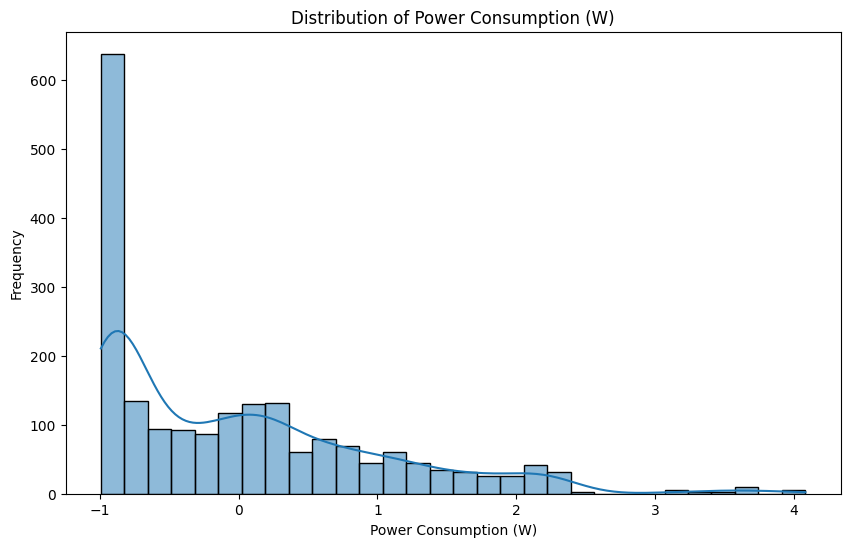

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Power Consumption (W)'], bins=30, kde=True)
plt.title('Distribution of Power Consumption (W)')
plt.xlabel('Power Consumption (W)')
plt.ylabel('Frequency')
plt.show()


## Average Daily Usage by Appliance Type

C:\Users\avina\AppData\Local\Temp\ipykernel_22136\2572219192.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Appliance', y='Daily Usage (hrs)', data=data, estimator='mean', ci=None, palette='viridis')
C:\Users\avina\AppData\Local\Temp\ipykernel_22136\2572219192.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Appliance', y='Daily Usage (hrs)', data=data, estimator='mean', ci=None, palette='viridis')


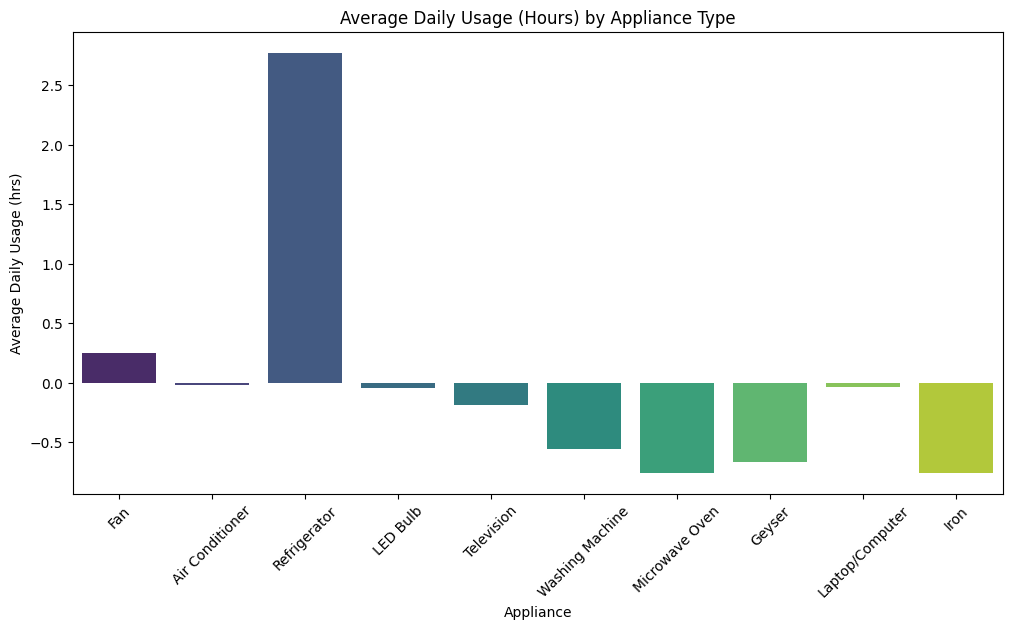

In [49]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Appliance', y='Daily Usage (hrs)', data=data, estimator='mean', ci=None, palette='viridis')
plt.title('Average Daily Usage (Hours) by Appliance Type')
plt.xticks(rotation=45)
plt.xlabel('Appliance')
plt.ylabel('Average Daily Usage (hrs)')
plt.show()

## Power Consumption vs. Daily Energy Consumption

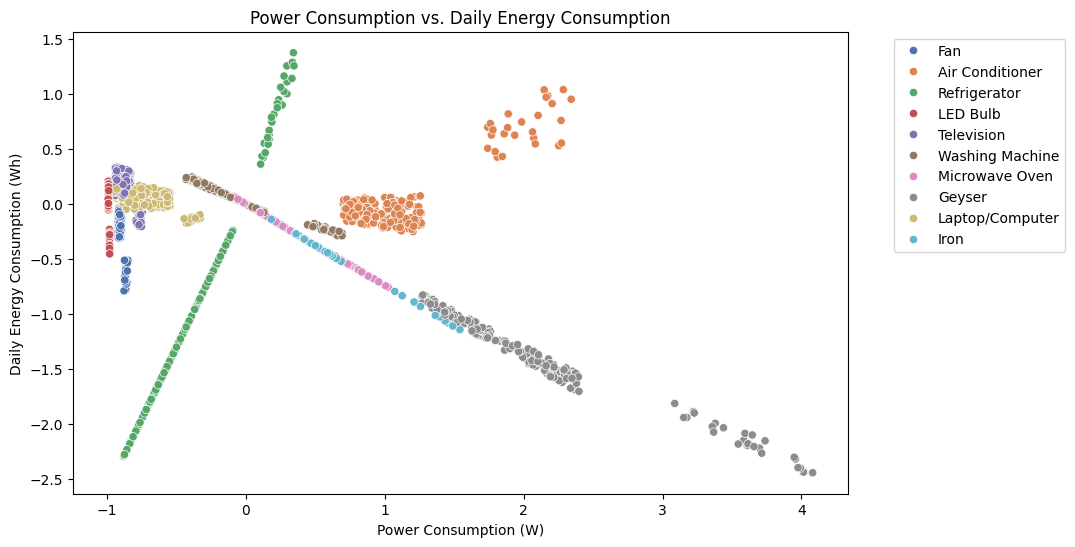

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Power Consumption (W)', y='Daily Energy Consumption (Wh)', data=data, hue='Appliance', palette='deep')
plt.title('Power Consumption vs. Daily Energy Consumption')
plt.xlabel('Power Consumption (W)')
plt.ylabel('Daily Energy Consumption (Wh)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Correlation Heatmap

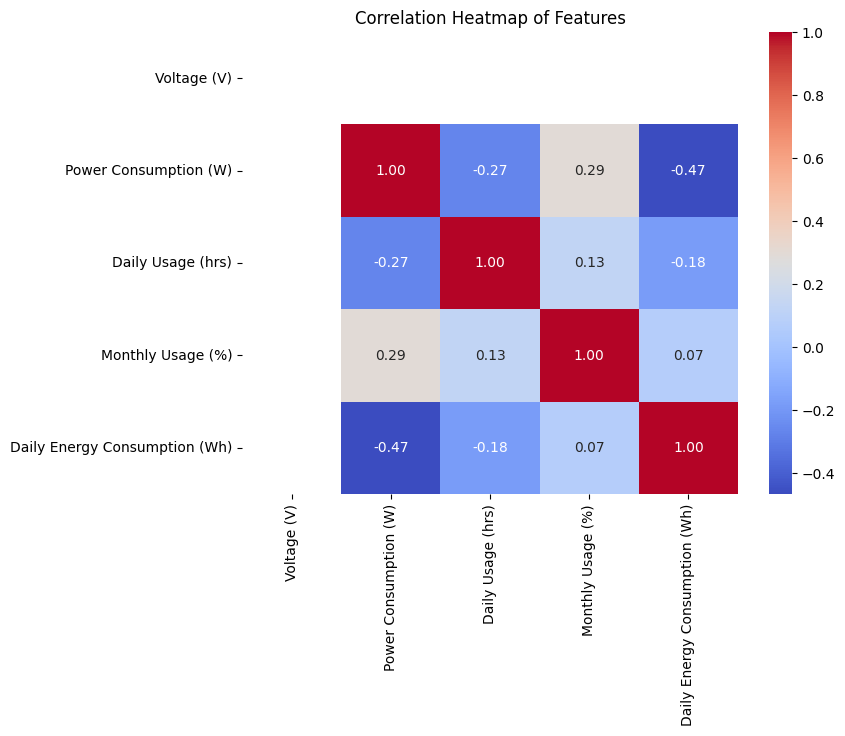

In [51]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data = data.select_dtypes(include=[np.number])

# Step 2: Handle any NaN values (optional, based on your data)
numeric_data = numeric_data.fillna(0)  # Or you can use numeric_data.dropna()

# Step 3: Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()


## Import Necessary Libraries for Modeling

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report


## Prepare the Data for Modeling

In [53]:
# Use only numeric columns for modeling
X = numeric_data.drop(columns=["Daily Energy Consumption (Wh)"])  # Features
y_reg = numeric_data["Daily Energy Consumption (Wh)"]  

## Train Regression Model for Energy Prediction

In [54]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# Train RandomForestRegressor
reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = reg_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (Regression): {rmse}")


Root Mean Squared Error (Regression): 0.014818478394584108


C:\Users\avina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Train Classification Model for Efficient Usage Detection

In [55]:
# Define high usage threshold for classification
high_usage_threshold = y_reg.quantile(0.75)  # Top 25% as high usage

# Create binary target for classification
y_class = (y_reg > high_usage_threshold).astype(int)

# Train-test split for classification
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Train RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Predict and evaluate classification
y_pred_class = classifier.predict(X_test)
print(f"Accuracy (Classification): {accuracy_score(y_test, y_pred_class)}")
print(classification_report(y_test, y_pred_class))


Accuracy (Classification): 0.9925
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       289
           1       0.99      0.98      0.99       111

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [56]:
def generate_suggestion(appliance, usage_prediction, threshold):
    if usage_prediction > threshold:
        return f"High usage detected for {appliance}. Consider optimizing settings or usage time."
    return f"Usage for {appliance} is within the efficient range."


In [57]:
for idx, appliance in enumerate(X.columns):
    usage_pred = reg_model.predict([X_test.iloc[idx]])[0]  # Predict usage
    print(generate_suggestion(appliance, usage_pred, high_usage_threshold))


Usage for Voltage (V) is within the efficient range.
High usage detected for Power Consumption (W). Consider optimizing settings or usage time.
Usage for Daily Usage (hrs) is within the efficient range.
High usage detected for Monthly Usage (%). Consider optimizing settings or usage time.


C:\Users\avina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\avina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\avina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\avina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
